## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'spam']
dataset=pd.read_csv(r"C:\Users\Brij\Downloads\spambase\spambase.data",  delimiter=",",names=columns)

In [3]:
dataset.head

<bound method NDFrame.head of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32         

In [4]:
X = dataset.iloc[:,:54].values
y = dataset.iloc[:,57]

In [5]:
X.shape

(4601, 54)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model 1: Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [9]:
pred_LG=lr.predict(X_test_scaled)
score_LG=accuracy_score(y_test,pred_LG)

In [10]:
score_LG

0.8766290182450044

## Model 2: Support Vector Classifier

In [11]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_scaled,y_train)

SVC()

In [12]:
pred_SVC=svm.predict(X_test_scaled)
score_SVC=accuracy_score(y_test,pred_SVC)

In [13]:
score_SVC

0.9270199826238054

## Model 3: Multinomial Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_scaled, y_train)

MultinomialNB()

In [15]:
pred_NB=classifier.predict(X_test_scaled)
score_NB=accuracy_score(y_test,pred_NB)

In [16]:
score_NB

0.8809730668983493

## Model 4: Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()
classification.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [18]:
pred_DT = classification.predict(X_test_scaled)
score_DT=accuracy_score(y_test,pred_DT)

In [19]:
score_DT

0.9026933101650738

## Model 5: KNeighbors Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [21]:
pred_KNN = classifier.predict(X_test_scaled)
score_KNN=accuracy_score(y_test,pred_KNN)

In [22]:
score_KNN

0.894005212858384

## Model 6: Random Forest Classifier 

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [24]:
pred_RF=rfc.predict(X_test_scaled)
score_RF=accuracy_score(y_test,pred_RF)

In [25]:
score_RF

0.9426585577758471

In [26]:
print("Accuracy Score of Machine Learning Models:")
print("---------------------------------------------------------------------")
print('Logistic Regression:       ', round((score_LG * 100), 2),"%")
print('Support Vector Classifier: ', round((score_SVC * 100), 2),"%")
print('Multinomial Naive Bayes:   ', round((score_NB * 100), 2),"%")
print('Decision Tree:             ', round((score_DT * 100), 2),"%")
print('KNeighbors Classifier:     ', round((score_KNN * 100), 2),"%")
print('Random Forest Classifier:  ', round((score_RF * 100), 2),"%")

Accuracy Score of Machine Learning Models:
---------------------------------------------------------------------
Logistic Regression:        87.66 %
Support Vector Classifier:  92.7 %
Multinomial Naive Bayes:    88.1 %
Decision Tree:              90.27 %
KNeighbors Classifier:      89.4 %
Random Forest Classifier:   94.27 %


# Model using Word Embedding Layers with Deep Learning (glove)

In [27]:
embedding_dict={}
f = open(r'C:\Users\Brij\Downloads\archive (1)\glove.6B.100d.txt','r',encoding="utf8")
for line in f:
    values=line.split()
    word=values[0]
    vectors=np.asarray(values[1:],'float32')
    embedding_dict[word]=vectors
f.close()

In [28]:
word_index = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference', ';', '(', '[', '!', '$', '#']

In [29]:
len(word_index)

54

In [30]:
num_words=len(word_index)
embedding_matrix = np.zeros((num_words, 100))
i = 0 
for word in word_index:
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        i = i +1

In [31]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Embedding
from keras.initializers import Constant
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,Flatten
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
import numpy as np
model=Sequential()
embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),input_length=num_words,trainable=False)
model.add(embedding)
model.add(Flatten()),
model.add(Dropout(0.4)),
model.add(Dense(32)),
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 54, 100)           5400      
                                                                 
 flatten (Flatten)           (None, 5400)              0         
                                                                 
 dropout (Dropout)           (None, 5400)              0         
                                                                 
 dense (Dense)               (None, 32)                172832    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 178,265
Trainable params: 172,865
Non-trainable params: 5,400
_________________________________________________________________


In [32]:
history = model.fit(X_train, y_train, batch_size=20, epochs=20, validation_split=0.2)

Epoch 1/20
138/138 [==============================] - 1s 4ms/step - loss: 0.6939 - accuracy: 0.7264 - val_loss: 0.3803 - val_accuracy: 0.8464
Epoch 2/20
138/138 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.8076 - val_loss: 0.3345 - val_accuracy: 0.8449
Epoch 3/20
138/138 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8261 - val_loss: 0.3929 - val_accuracy: 0.8261
Epoch 4/20
138/138 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8239 - val_loss: 0.3276 - val_accuracy: 0.8565
Epoch 5/20
138/138 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.8232 - val_loss: 0.3542 - val_accuracy: 0.8203
Epoch 6/20
138/138 [==============================] - 0s 3ms/step - loss: 0.3575 - accuracy: 0.8446 - val_loss: 0.3166 - val_accuracy: 0.8522
Epoch 7/20
138/138 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8435 - val_loss: 0.3269 - val_accuracy: 0.8551
Epoch 

In [33]:
result = model.evaluate(X_test, y_test, batch_size=128)
print(result)

9/9 [==============================] - 0s 4ms/step - loss: 0.3425 - accuracy: 0.8540
[0.3425476849079132, 0.8540399670600891]


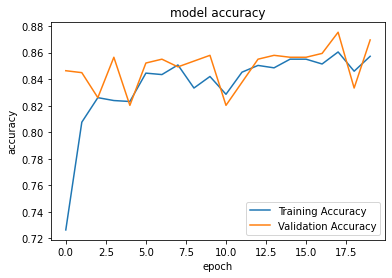

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()